In [1]:
import io
import os
from google.cloud import vision
from google.cloud.vision import types
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
dir(vision)

['ImageAnnotatorClient',
 'ProductSearchClient',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'absolute_import',
 'enums',
 'types']

In [10]:
import os
path = os.path.abspath(vision.__file__)
path

'/opt/anaconda3/lib/python3.7/site-packages/google/cloud/vision.py'

In [3]:
client = vision.ImageAnnotatorClient()

In [28]:
dir(client)

['SERVICE_ADDRESS',
 '_INTERFACE_NAME',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_client_info',
 '_get_all_features',
 '_inner_api_calls',
 '_method_configs',
 'annotate_image',
 'async_batch_annotate_files',
 'async_batch_annotate_images',
 'batch_annotate_files',
 'batch_annotate_images',
 'crop_hints',
 'document_text_detection',
 'enums',
 'face_detection',
 'from_service_account_file',
 'from_service_account_json',
 'image_properties',
 'label_detection',
 'landmark_detection',
 'logo_detection',
 'object_localization',
 'product_search',
 'safe_search_detection',
 'text_detection',
 'transport',
 'web_detection']

In [7]:
file_name = os.path.abspath('/Users/milk/Desktop/git_repositories/READMISSIONS/prliminary_geotiff_tiling/TEST.png')

with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

In [8]:
image = types.Image(content=content)

In [43]:
response = client.label_detection(image=image)
labels = response.label_annotations

for label in labels:
    print(f"description: {label.description }")
    print(f"confidence: {label.confidence}")
    # print(f"locations: {label.locations}")
    # print(f"properties: {label.properties}")
    print(f"score: {label.score}")
    print()

description: Wall
confidence: 0.0
score: 0.7846120595932007

description: Room
confidence: 0.0
score: 0.7139228582382202

description: Beige
confidence: 0.0
score: 0.5993316173553467

description: Plant
confidence: 0.0
score: 0.585474967956543



In [18]:
# dir(labels[0])

# [label.description for label in labels]

In [44]:
dir(response)

['ByteSize',
 'Clear',
 'ClearExtension',
 'ClearField',
 'CopyFrom',
 'DESCRIPTOR',
 'DiscardUnknownFields',
 'Extensions',
 'FindInitializationErrors',
 'FromString',
 'HasExtension',
 'HasField',
 'IsInitialized',
 'ListFields',
 'MergeFrom',
 'MergeFromString',
 'ParseFromString',
 'RegisterExtension',
 'SerializePartialToString',
 'SerializeToString',
 'SetInParent',
 'UnknownFields',
 'WhichOneof',
 '_CheckCalledFromGeneratedFile',
 '_SetListener',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_extensions_by_name',
 '_extensions_by_number',
 'context',
 'crop_hints_annotation',
 'error',
 'face_annotations',


In [122]:
%%time
"""
standalone cell
"""

IMG_DIR = 'test_images/'

client = vision.ImageAnnotatorClient()

new_rows = []

print(f"Working on {len(os.listdir(IMG_DIR))} files")

for file in os.listdir(IMG_DIR):
    f_path = f"{IMG_DIR}{file}"

    with io.open(f_path, 'rb') as image_file:
        content = image_file.read()

    image = types.Image(content=content)

    features = [{"type": vision.enums.Feature.Type.LABEL_DETECTION},
                {"type": vision.enums.Feature.Type.IMAGE_PROPERTIES}]

    response = client.annotate_image({'image': image, 'features':features})

    print('\t', file)

    # agg labels into a list, single list per image
    labels = [label.description for label in response.label_annotations]
    confidence = [label.score for label in response.label_annotations]

    # get dominant colors by image
    dom_colors = response.image_properties_annotation.dominant_colors.colors

    rgb = [(int(c.color.red), int(c.color.green), int(c.color.blue)) for c in dom_colors]
    pixel_frac = [c.pixel_fraction for c in dom_colors]
    color_scores = [c.score for c in dom_colors]

    row = {
        'file':f_path,
        'labels': labels,
        'label_scores': confidence,
        'colors':rgb,
        'color_pixel_fraction':pixel_frac,
        'color_scores':color_scores
    }

    new_rows.append(row)
    
df = pd.DataFrame(new_rows)
print(df.shape)
df.head()

Working on 11 files
chunk_1_img_498.png
chunk_6_img_419.png
chunk_1_img_748.png
chunk_2_img_283.png
chunk_1_img_196.png
chunk_6_img_428.png
chunk_2_img_222.png
chunk_2_img_814.png
chunk_6_img_851.png
chunk_7_img_183.png
chunk_2_img_596.png
CPU times: user 1.35 s, sys: 3.32 s, total: 4.67 s
Wall time: 4min 54s


,file,labels,label_scores,colors,color_pixel_fraction,color_scores
0,test_images/chunk_1_img_498.png,"[Wall, Room, Beige, Plant]","[0.7846120595932007, 0.7139228582382202, 0.599...","[(127, 109, 79), (94, 84, 59), (64, 57, 36), (...","[0.25297778844833374, 0.18564444780349731, 0.0...","[0.4583994448184967, 0.3757273256778717, 0.136..."
1,test_images/chunk_6_img_419.png,"[Text, Wall, Architecture, Land lot, Building,...","[0.8524878621101379, 0.7846120595932007, 0.726...","[(92, 86, 68), (245, 242, 235), (127, 116, 97)...","[0.20573332905769348, 0.42631110548973083, 0.1...","[0.4187917113304138, 0.0025399914011359215, 0...."
2,test_images/chunk_1_img_748.png,"[Brown, Beige, Metal, Pattern, Floor, Architec...","[0.8245404362678528, 0.7901132106781006, 0.659...","[(87, 84, 73), (244, 244, 239), (60, 57, 46), ...","[0.2707555592060089, 0.42595556378364563, 0.11...","[0.4875350892543793, 0.0025570192374289036, 0...."
3,test_images/chunk_2_img_283.png,"[Wall, Infrastructure, Architecture, Urban des...","[0.8397860527038574, 0.7422335147857666, 0.726...","[(84, 83, 72), (242, 242, 236), (57, 56, 46), ...","[0.20902222394943237, 0.4269333481788635, 0.13...","[0.3640913963317871, 0.003064340678974986, 0.2..."
4,test_images/chunk_1_img_196.png,"[Architecture, Beige]","[0.6545118689537048, 0.5993316173553467]","[(99, 88, 65), (247, 245, 238), (59, 54, 37), ...","[0.26671111583709717, 0.42471110820770264, 0.0...","[0.5618568062782288, 0.0020879493094980717, 0...."


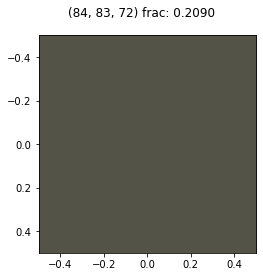

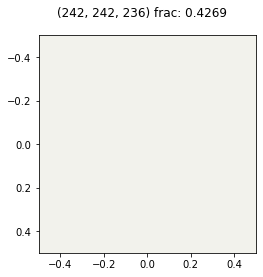

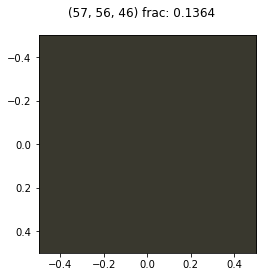

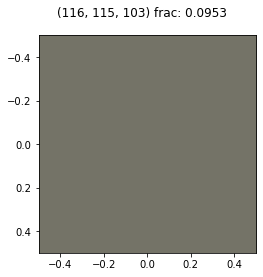

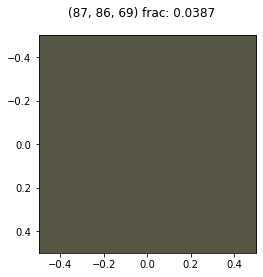

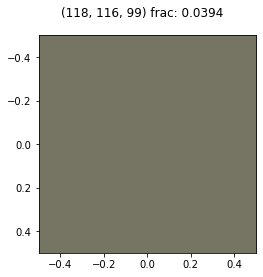

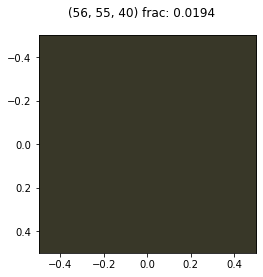

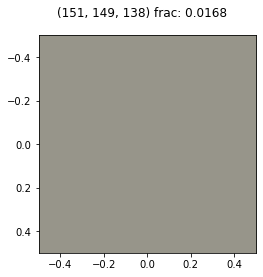

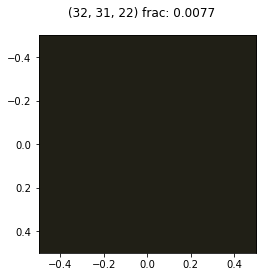

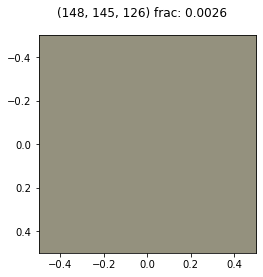

In [127]:
test = df.iloc[3]
cols = test['colors']
fracs = test['color_pixel_fraction']

for idx, col in enumerate(cols):
    fig = plt.figure()

    plt.imshow([[col]])
    title = f"{col} frac: {fracs[idx]:.4f}"
    fig.suptitle(title)
    plt.show()